In [49]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing, metrics, model_selection, linear_model
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.linear_model import Lasso, Ridge, LassoCV, RidgeCV


In [5]:
# Load the data
data = pd.read_csv('m1_final.csv')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28820 entries, 0 to 28819
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MONTH              28820 non-null  int64  
 1   DAY_OF_MONTH       28820 non-null  int64  
 2   DAY_OF_WEEK        28820 non-null  int64  
 3   OP_UNIQUE_CARRIER  28820 non-null  object 
 4   TAIL_NUM           28820 non-null  object 
 5   DEST               28820 non-null  object 
 6   DEP_DELAY          28820 non-null  int64  
 7   CRS_ELAPSED_TIME   28820 non-null  int64  
 8   DISTANCE           28820 non-null  int64  
 9   CRS_DEP_M          28820 non-null  int64  
 10  DEP_TIME_M         28820 non-null  int64  
 11  CRS_ARR_M          28820 non-null  int64  
 12  Temperature        28820 non-null  int64  
 13  Dew Point          28820 non-null  object 
 14  Humidity           28820 non-null  int64  
 15  Wind               28818 non-null  object 
 16  Wind Speed         288

In [11]:
data.isnull().sum()

MONTH                0
DAY_OF_MONTH         0
DAY_OF_WEEK          0
OP_UNIQUE_CARRIER    0
TAIL_NUM             0
DEST                 0
DEP_DELAY            0
CRS_ELAPSED_TIME     0
DISTANCE             0
CRS_DEP_M            0
DEP_TIME_M           0
CRS_ARR_M            0
Temperature          0
Dew Point            0
Humidity             0
Wind                 0
Wind Speed           0
Wind Gust            0
Pressure             0
Condition            0
sch_dep              0
sch_arr              0
TAXI_OUT             0
dtype: int64

In [10]:
# Fill missing values in 'Wind' with mode
data['Wind'].fillna(data['Wind'].mode().values[0], inplace=True)

In [13]:
#Check what features are showing as objects
data.select_dtypes(["object"]).head()

,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,Wind,Condition
0,B6,N828JB,CHS,W,Fair / Windy
1,B6,N992JB,LAX,W,Fair / Windy
2,B6,N959JB,FLL,W,Fair / Windy
3,B6,N999JQ,MCO,W,Fair / Windy
4,DL,N880DN,ATL,W,Fair / Windy


In [12]:

# Convert 'Dew Point' to integer
data["Dew Point"] = data["Dew Point"].astype("int64")

In [15]:
#Check average TAXI_OUT time
print(data["TAXI_OUT"].describe())

count    28820.000000
mean        20.858570
std          6.851915
min          5.000000
25%         16.000000
50%         19.000000
75%         25.000000
max         41.000000
Name: TAXI_OUT, dtype: float64


c:\Users\T\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


Text(0.5, 0, 'Minutes')

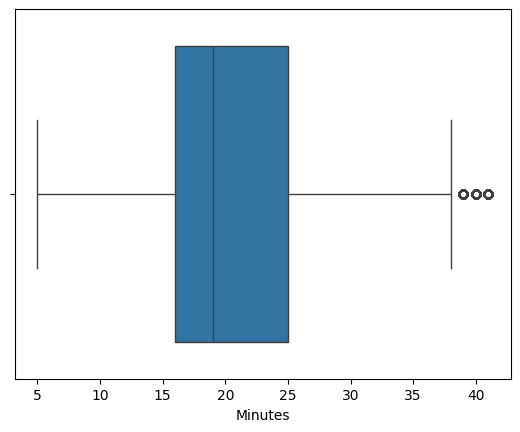

In [50]:
#Average Taxi out time in boxplot
sns.boxplot(x=data["TAXI_OUT"])
plt.xlabel('Minutes') # Add x-axis label

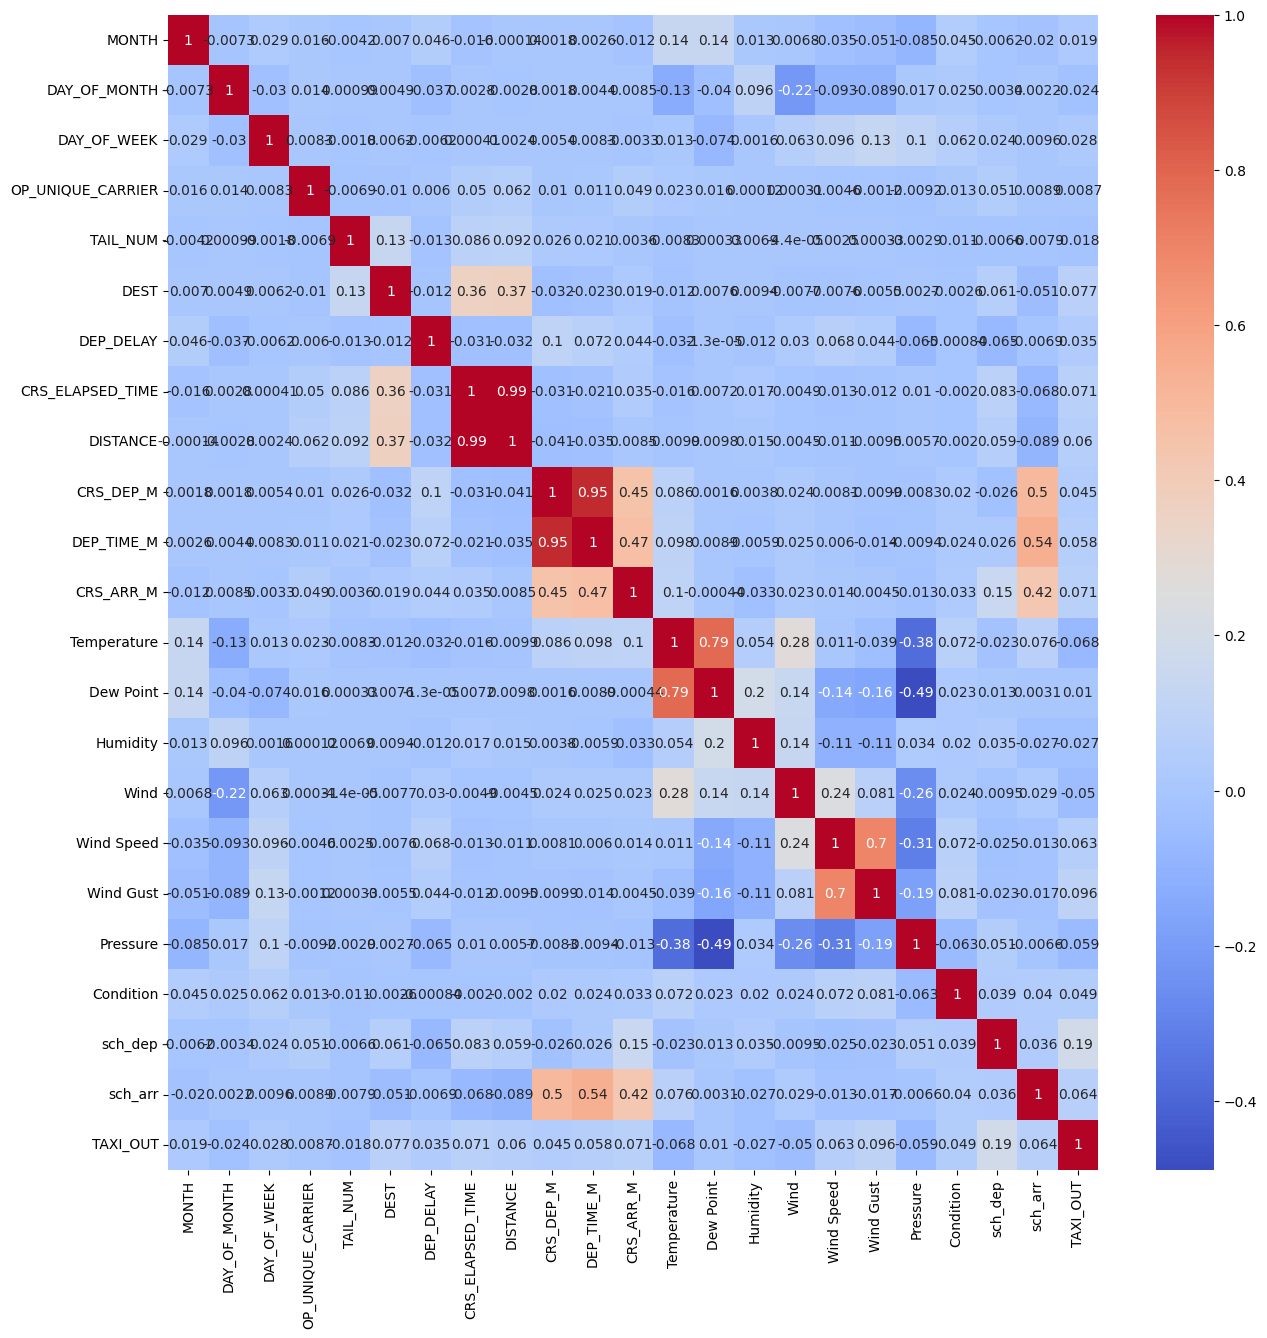

In [55]:
#plot a correlation matrix to see if any variables have a distinct relationship
corr_matrix = data.corr(numeric_only=True)
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.tight_layout
plt.show()

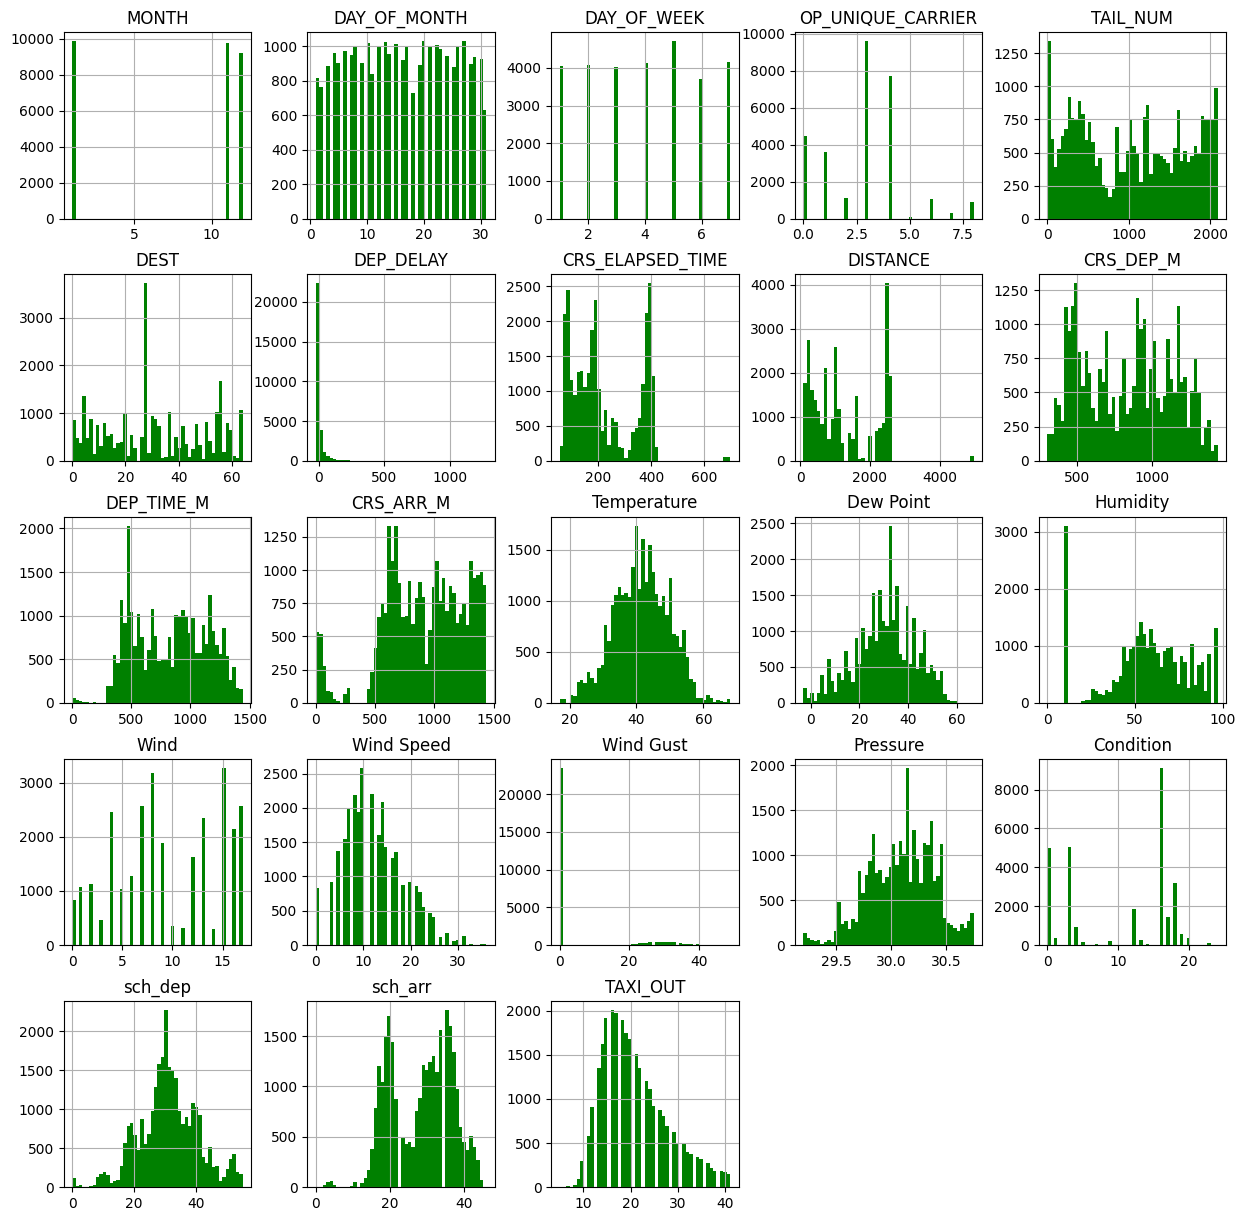

In [51]:
#Plot a histogram showing the distribution of the data 
data.hist(bins=50, figsize=(15,15), color= 'Green',)
plt.show()

<Axes: xlabel='DEST', ylabel='count'>

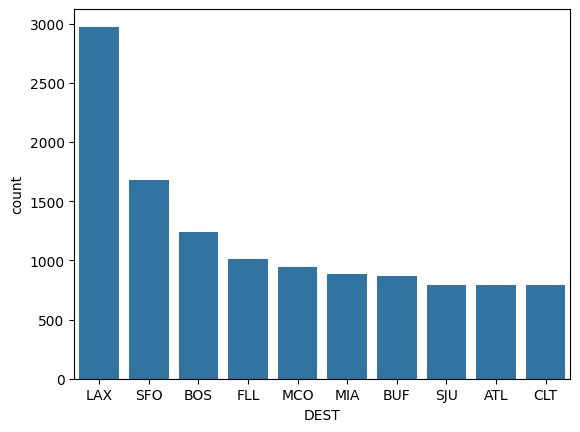

In [25]:
#Create a plot showing the top 10 destinations in our dataset
sns.countplot(x='DEST', data=data, order=data['DEST'].value_counts().iloc[:10].index)

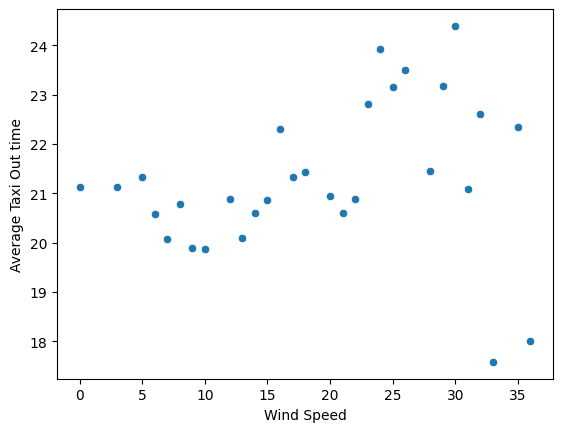

In [65]:
# Group the data by 'Wind Speed' and calculate the mean 'TAXI_OUT' for each group
average_taxi_out = data.groupby('Wind Speed')['TAXI_OUT'].mean().reset_index()

# Plot the averages
sns.scatterplot(x='Wind Speed', y='TAXI_OUT', data=average_taxi_out)

plt.xlabel('Wind Speed')
plt.ylabel('Average Taxi Out time')
#plt.title('Average Taxi Out time vs. Wind Speed')
plt.show()


In [34]:
# Encode categorical variables
label_encoder = LabelEncoder()
categorical_cols = ['OP_UNIQUE_CARRIER', 'DEST', 'Wind', 'Condition', 'TAIL_NUM']
data[categorical_cols] = data[categorical_cols].apply(lambda col: label_encoder.fit_transform(col.astype(str)))

In [35]:
# Normalize the data
scaler = MinMaxScaler()
data_normalized = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

In [36]:
# Split the data into independent and dependent variables
X = data_normalized.iloc[:,0:22]
y = data_normalized.iloc[:,22]

In [82]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.20, random_state=32)

In [83]:
#Check how the data has been split
print("X_Train size is:",X_train.shape)
print("X_Test size is:",X_test.shape)
print("Y_train size is:",y_train.shape)
print("Y_Test size is:",y_test.shape)

X_Train size is: (23056, 22)
X_Test size is: (5764, 22)
Y_train size is: (23056,)
Y_Test size is: (5764,)


In [84]:
# Fit a Linear Regression model
linear_reg = linear_model.LinearRegression().fit(X_train, y_train)


In [85]:
# Make predictions
y_pred = linear_reg.predict(X_test)

In [86]:
# Calculate and print metrics
print('R squared: {:.2f}'.format(linear_reg.score(X_test, y_test)))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Square Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Square Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R squared: 0.09
Mean Absolute Error: 0.14579469133861991
Mean Square Error: 0.033669023967636956
Root Mean Square Error: 0.1834912095105293


In [76]:

# Lasso model with fit
model_lasso = linear_model.Lasso(alpha=0.001).fit(X_train, y_train)

# Make predictions
pred_lasso = model_lasso.predict(X_test)
lasso_df = pd.DataFrame({'Actual_score':y_test, 'Predicted_score':pred_lasso})
lasso_df



,Actual_score,Predicted_score
9362,0.500000,0.484751
23840,0.250000,0.515459
24617,0.472222,0.491539
24899,0.388889,0.516906
2007,0.416667,0.400982
...,...,...
4024,0.277778,0.409655
2252,0.972222,0.475263
15796,0.833333,0.468180
4388,0.638889,0.400892


In [77]:

# Calculate and print metrics
print('R squared: {:.2f}'.format(model_lasso.score(X_test, y_test)))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred_lasso))
print('Mean Square Error:', metrics.mean_squared_error(y_test, pred_lasso))
print('Root Mean Square Error:', np.sqrt(metrics.mean_squared_error(y_test, pred_lasso)))


R squared: 0.06
Mean Absolute Error: 0.14705441628690066
Mean Square Error: 0.034024286364860115
Root Mean Square Error: 0.1844567330429012


In [78]:
# Define the alphas 
alphas = [0.001, 0.01, 0.1, 1]

# Create Lasso regression with the possible alpha values
lassocv = LassoCV(alphas=alphas, cv=5)

# Fit the model
lassocv.fit(X_train, y_train)

# The best alpha value is stored in `lassocv.alpha_`
print("Best alpha: ", lassocv.alpha_)

Best alpha:  0.001


In [79]:
# Ridge model with fit
model_ridge = Ridge(alpha=0.1).fit(X_train, y_train)

# Make predictions
pred_ridge = model_ridge.predict(X_test)

#View against test data
ridge_df = pd.DataFrame({'Actual_score': y_test, 'Predicted_score': pred_ridge})
ridge_df

,Actual_score,Predicted_score
9362,0.500000,0.508821
23840,0.250000,0.503663
24617,0.472222,0.500443
24899,0.388889,0.526066
2007,0.416667,0.367401
...,...,...
4024,0.277778,0.371127
2252,0.972222,0.480541
15796,0.833333,0.520293
4388,0.638889,0.382409


In [80]:
#Print evaluation metrics
R_Mean_Absolute_Error = metrics.mean_absolute_error(y_test, pred_ridge)
R_Mean_Sq_Error = metrics.mean_squared_error(y_test, pred_ridge)
R_Root_Mean_Sqrr = np.sqrt(metrics.mean_squared_error(y_test, pred_ridge))

print('R squared:{:.2f}'.format(linear_reg.score(X_test, y_test)))
print('Mean Absolute Error:', R_Mean_Absolute_Error)
print('Mean Square Error:', R_Mean_Sq_Error)
print('Root Mean Square Error:', R_Root_Mean_Sqrr)

R squared:0.09
Mean Absolute Error: 0.14480051878037858
Mean Square Error: 0.03314983331713387
Root Mean Square Error: 0.18207095681940563


In [81]:
# Define the alphas 
alphas = [0.001, 0.01, 0.1, 1]

# Create ridge regression with three possible alpha values
ridgecv = RidgeCV(alphas=alphas, cv=5)

# Fit the model
ridgecv.fit(X_train, y_train)

# The best alpha value is stored in `ridgecv.alpha_`
print("Best alpha: ", ridgecv.alpha_)

Best alpha:  0.1
